Original Image:


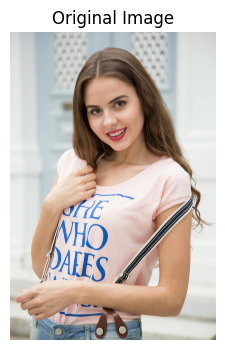

T-shirt Color Changed to Blue:


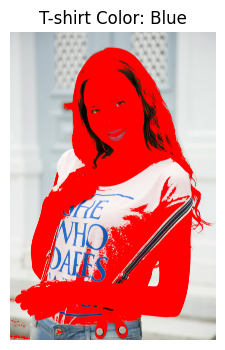

Sky Color Changed to Yellow:


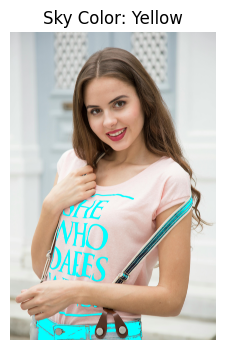

Grass Color Changed to Purple:


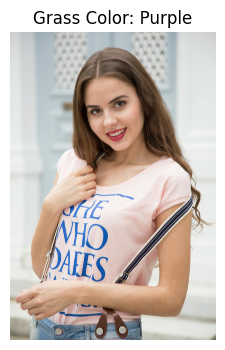

Image Variations:


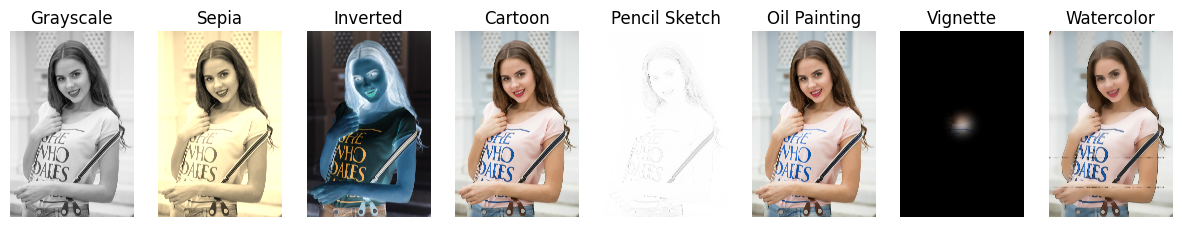

Seasonal Effects:


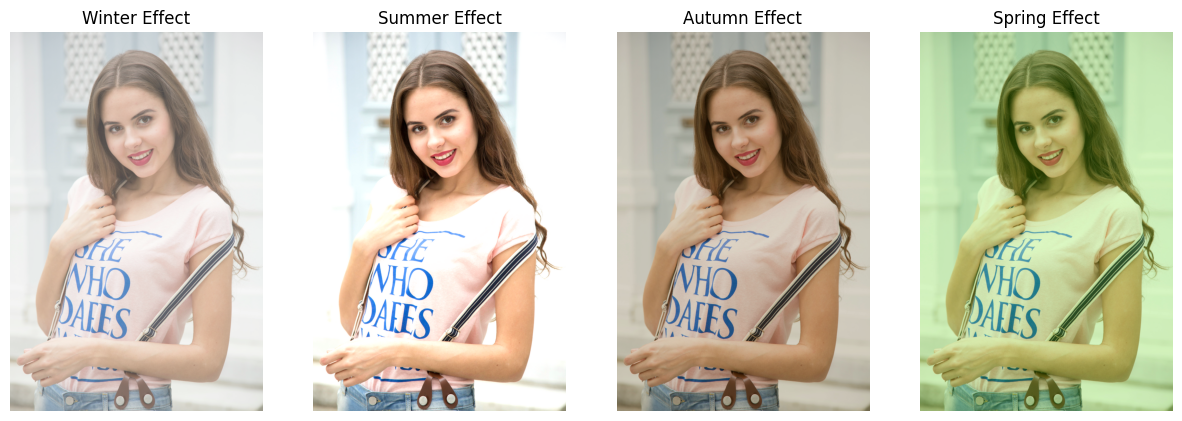

Brightness and Contrast Adjusted:


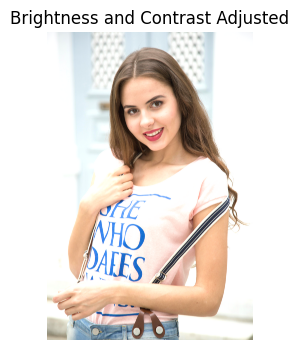

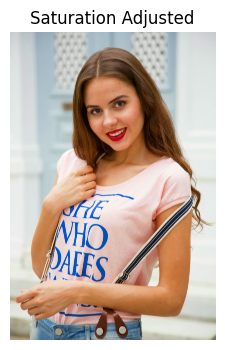

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Color Segmentation and Mask Creation
def create_mask(image, lower_hsv, upper_hsv):
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_img, lower_hsv, upper_hsv)
    return mask

### 2. Change Region Color Based on Mask
def change_region_color(image, mask, new_color):
    result = image.copy()
    result[mask != 0] = new_color
    return result

### 3. Change T-shirt Color
def change_tshirt_color(image, new_color=(255, 0, 0)):
    lower_color = np.array([0, 30, 60])  
    upper_color = np.array([20, 255, 255])
    mask = create_mask(image, lower_color, upper_color)
    result = change_region_color(image, mask, new_color)
    return result

### 4. Change Sky Color
def change_sky_color(image, new_color=(135, 206, 235)):
    lower_sky = np.array([90, 50, 50])
    upper_sky = np.array([130, 255, 255])
    mask = create_mask(image, lower_sky, upper_sky)
    result = change_region_color(image, mask, new_color)
    return result

### 5. Additional Filters (Grayscale, Sepia, Invert)
def apply_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_sepia(image):
    kernel = np.array([[0.272, 0.534, 0.131],
                       [0.349, 0.686, 0.168],
                       [0.393, 0.769, 0.189]])
    sepia_image = cv2.transform(image, kernel)
    return np.clip(sepia_image, 0, 255)

def apply_invert(image):
    return cv2.bitwise_not(image)

### 6. Basic Adjustments (Brightness, Contrast, Saturation)
def apply_brightness_contrast(image, brightness=0, contrast=0):
    new_image = np.clip(image * (contrast / 127 + 1) - contrast + brightness, 0, 255).astype(np.uint8)
    return new_image

def apply_saturation(image, saturation_factor=1.5):
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_img[:, :, 1] = np.clip(hsv_img[:, :, 1] * saturation_factor, 0, 255)
    return cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

### 7. Blur and Sharpen Filters
def apply_blur(image, blur_value=5):
    return cv2.GaussianBlur(image, (blur_value, blur_value), 0)

def apply_sharpen(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

### 8. Cartoon Effect
def apply_cartoon_effect(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(image, 9, 300, 300)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon

### 9. Pencil Sketch Effect
def apply_pencil_sketch(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    inverted = cv2.bitwise_not(gray)
    blurred = cv2.GaussianBlur(inverted, (21, 21), 0)
    inverted_blur = cv2.bitwise_not(blurred)
    sketch = cv2.divide(gray, inverted_blur, scale=256.0)
    return sketch

### 10. Oil Painting Effect
def apply_oil_painting(image):
    return cv2.xphoto.oilPainting(image, 7, 1)

### 11. Vignette Effect
def apply_vignette(image):
    rows, cols = image.shape[:2]
    kernel_x = cv2.getGaussianKernel(cols, 200)
    kernel_y = cv2.getGaussianKernel(rows, 200)
    kernel = kernel_y * kernel_x.T
    mask = 255 * kernel / np.linalg.norm(kernel)
    vignette = np.copy(image)
    for i in range(3):
        vignette[:, :, i] = vignette[:, :, i] * mask
    return vignette

### 12. Change Grass Color
def change_grass_color(image, new_color=(0, 255, 0)):
    lower_grass = np.array([40, 40, 40])
    upper_grass = np.array([90, 255, 255])
    mask = create_mask(image, lower_grass, upper_grass)
    result = change_region_color(image, mask, new_color)
    return result

### 13. Seasonal Effects
def apply_winter_effect(image):
    return cv2.addWeighted(image, 0.7, np.ones(image.shape, dtype=np.uint8) * 255, 0.3, 0)

def apply_summer_effect(image):
    return cv2.addWeighted(image, 1.2, np.zeros(image.shape, dtype=np.uint8), 0, 0)

def apply_autumn_effect(image):
    overlay = np.full(image.shape, (10, 70, 100), dtype=np.uint8)  # Reddish tint
    return cv2.addWeighted(image, 0.8, overlay, 0.2, 0)

def apply_spring_effect(image):
    overlay = np.full(image.shape, (0, 255, 100), dtype=np.uint8)  # Greenish tint
    return cv2.addWeighted(image, 0.8, overlay, 0.2, 0)

### 14. Artistic Effects
def apply_watercolor_effect(image):
    blurred = cv2.GaussianBlur(image, (21, 21), 0)
    return cv2.stylization(blurred, sigma_s=60, sigma_r=0.6)

### 15. Display Image Function
def display_image(image, title):
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_variations(variations):
    plt.figure(figsize=(15, 8))
    for i, (title, img) in enumerate(variations):
        plt.subplot(1, len(variations), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

### MAIN FUNCTION TO RUN TOOL ###
def run_color_palette_tool(image_paths=None):
    # Load Images
    if image_paths:
        images = [cv2.imread(path) for path in image_paths]
        
        for image in images:
            if image is None:
                print("Error: Could not load image.")
                continue
            
            # Original Image
            print("Original Image:")
            display_image(image, "Original Image")
            
            # Change T-shirt Color (Example: Change to Blue)
            tshirt_color_changed = change_tshirt_color(image, (0, 0, 255))  # Blue T-shirt
            print("T-shirt Color Changed to Blue:")
            display_image(tshirt_color_changed, "T-shirt Color: Blue")

            # Change Sky Color (Example: Change to Yellow)
            sky_color_changed = change_sky_color(image, (255, 255, 0))  # Yellow Sky
            print("Sky Color Changed to Yellow:")
            display_image(sky_color_changed, "Sky Color: Yellow")

            # Change Grass Color (Example: Change to Purple)
            grass_color_changed = change_grass_color(image, (128, 0, 128))  # Purple Grass
            print("Grass Color Changed to Purple:")
            display_image(grass_color_changed, "Grass Color: Purple")

            # Apply Filters and Effects
            grayscale_img = apply_grayscale(image)
            sepia_img = apply_sepia(image)
            invert_img = apply_invert(image)
            cartoon_img = apply_cartoon_effect(image)
            sketch_img = apply_pencil_sketch(image)
            oil_painting_img = apply_oil_painting(image)
            vignette_img = apply_vignette(image)
            watercolor_img = apply_watercolor_effect(image)
            
            print("Image Variations:")
            filters_and_effects = [
                ("Grayscale", grayscale_img),
                ("Sepia", sepia_img),
                ("Inverted", invert_img),
                ("Cartoon", cartoon_img),
                ("Pencil Sketch", sketch_img),
                ("Oil Painting", oil_painting_img),
                ("Vignette", vignette_img),
                ("Watercolor", watercolor_img)
            ]
            display_variations(filters_and_effects)
            
            # Apply Seasonal Effects
            winter_effect_img = apply_winter_effect(image)
            summer_effect_img = apply_summer_effect(image)
            autumn_effect_img = apply_autumn_effect(image)
            spring_effect_img = apply_spring_effect(image)

            seasonal_effects = [
                ("Winter Effect", winter_effect_img),
                ("Summer Effect", summer_effect_img),
                ("Autumn Effect", autumn_effect_img),
                ("Spring Effect", spring_effect_img)
            ]
            print("Seasonal Effects:")
            display_variations(seasonal_effects)
            
            # Adjustments Example
            bright_contrast_img = apply_brightness_contrast(image, brightness=30, contrast=20)
            sat_img = apply_saturation(image, saturation_factor=1.5)
            print("Brightness and Contrast Adjusted:")
            display_image(bright_contrast_img, "Brightness and Contrast Adjusted")
            display_image(sat_img, "Saturation Adjusted")

### Example Usage
image_paths = ['/Users/macbook/Desktop/AI/1.jpg']  # Add your image paths here
run_color_palette_tool(image_paths)
